In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-silver-price-vs-geopolitical-risk-19852025/Gold-Silver-GeopoliticalRisk_HistoricalData.csv
/kaggle/input/gold-silver-price-vs-geopolitical-risk-19852025/All_Historical_Data_Separately/Gold Spot Price Daily.csv
/kaggle/input/gold-silver-price-vs-geopolitical-risk-19852025/All_Historical_Data_Separately/Silver Spot Price Daily.csv
/kaggle/input/gold-silver-price-vs-geopolitical-risk-19852025/All_Historical_Data_Separately/Geopolitical Risk Index Daily.csv


<div style="
    background-image: url('https://i.postimg.cc/Qt051F3p/d-fklaj.jpg');
    background-size: cover;
    font-family: 'Trebuchet MS', sans-serif;
    color: #3F2305;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px;
    border: double 6px #1E90FF;
    box-shadow: 0px 0px 20px 5px #32CD32;
    text-shadow: 2px 2px 4px rgba(54,69,79,0.4);
    word-spacing: 5px;
    letter-spacing: 1px;
    line-height: 1.6;
">
    <h1 style="margin: 0; font-size: 130%; color: #3F2305;">
        ✨ ⚜️ Gold–Silver Relationship and its Mean Reversion Speed ⚜️ ✨
    </h1>
</div>

<div style="background-color:#F9D689; padding: 20px; border-radius: 12px; 
            box-shadow: 4px 4px 8px rgba(0, 0, 128, 0.8);
            border:5px solid #0A2342; color:black;">

  <p style="color:black; font-size:16px;">
    This project is designed for to understand the joint dynamics of gold and silver prices under geopolitical uncertainty. 
    By combining long-horizon precious metal price data with a Geopolitical Risk Daily (GPRD) index, 
    the study enables robust time-series modeling, relative value analysis, and regime-aware trading strategies.
  </p>

  <center>
    <h1 style="border-radius:6px; border:6px double #973131; width:95%;
               text-shadow:3px 3px 6px white; color:black; padding:10px;">
      Gold–Silver Price Dynamics under Geopolitical Risk
    </h1>
  </center>

  <h2 style="text-shadow:4px 4px 8px rgba(0,0,0,0.6); font-size:30px;">
    Problem Statement
  </h2>

  <p style="color:black;">
    Precious metals such as gold and silver are widely considered safe-haven assets, 
    yet their price behavior varies significantly across geopolitical regimes. 
    This project investigates how geopolitical risk influences the joint movement, 
    volatility, and relative valuation of gold and silver using a long-span daily dataset.
    The goal is to model structural relationships, quantify risk sensitivity, 
    and assess whether geopolitical information improves forecasting and trading decisions.
  </p>

  <h2 style="text-shadow:4px 4px 8px rgba(0,0,0,0.6); font-size:30px;">
    Dataset Overview
  </h2>

  <ul style="color:black; font-size:16px;">
    <li><strong>What it is:</strong> A daily time-series panel combining gold and silver OHLC data with the
        Geopolitical Risk Daily (GPRD) index, including overall risk, acts-based risk, and threats-based risk.</li>
    <li><strong>Period:</strong> 1985-01-02 to 2025-09-10 (daily).</li>
    <li><strong>Size:</strong> 10,571 rows × 15 columns.</li>
    <li><strong>Granularity:</strong> One observation per calendar date.</li>
    <li><strong>Primary Key:</strong> DATE.</li>
  </ul>

  <h3 style="text-shadow:1px 1px 2px black;">
    Key Variables
  </h3>

  <ul style="color:black;">
    <li><code>Gold_Open, Gold_High, Gold_Low, Gold_Close</code></li>
    <li><code>Silver_Open, Silver_High, Silver_Low, Silver_Close</code></li>
    <li><code>Gold_Change(%), Silver_Change(%)</code></li>
    <li><code>GPRD_Overall</code> – Aggregate geopolitical risk index</li>
    <li><code>GPRD_Acts</code> – Risk from realized geopolitical actions</li>
    <li><code>GPRD_Threats</code> – Risk from geopolitical threats and tensions</li>
    <li><code>EVENT</code> – Sparse annotations of major geopolitical events</li>
  </ul>

  <h3 style="text-shadow:1px 1px 2px black;">
    Data Quality & Missingness
  </h3>

  <ul style="color:black;">
    <li>Silver OHLC and percentage change contain 7 missing observations.</li>
    <li>GPRD fields contain 2 missing observations.</li>
    <li>EVENT labels are present on only 11 days and empty otherwise.</li>
  </ul>

  <h2 style="text-shadow:4px 4px 8px rgba(0,0,0,0.6); font-size:30px;">
    Project Objectives
  </h2>

  <ol style="color:black; font-size:16px;">
    <li>
      <strong>Time-Series Exploration:</strong>
      Identify long-term trends, regime shifts, volatility clustering, and structural breaks
      in gold and silver prices.
    </li>
    <li>
      <strong>Relative Value Analysis:</strong>
      Study the gold–silver spread and ratio dynamics under varying geopolitical risk levels.
    </li>
    <li>
      <strong>Geopolitical Risk Impact:</strong>
      Quantify how GPRD components affect returns, volatility, and co-movement of precious metals.
    </li>
    <li>
      <strong>Forecasting Models:</strong>
      Develop and evaluate ARIMA, multivariate, and regime-aware models incorporating geopolitical signals.
    </li>
    <li>
      <strong>Trading Strategy Design:</strong>
      Backtest risk-conditioned pair trading and hedging strategies driven by gold–silver relative mispricing.
    </li>
  </ol>

  <h2 style="text-shadow:4px 4px 8px rgba(0,0,0,0.6); font-size:30px;">
    Considerations & Limitations
  </h2>

  <p style="color:black;">
    Geopolitical risk indices are proxies and may not fully capture market expectations in real time.
    Sparse event annotations limit supervised event-based modeling.
    All trading results must be evaluated with realistic transaction costs and regime instability in mind.
  </p>

  <h2 style="text-shadow:4px 4px 8px rgba(0,0,0,0.6); font-size:30px;">
    Expected Deliverables
  </h2>

  <ul style="color:black; font-size:16px;">
    <li>Exploratory visualizations of gold, silver, spreads, and geopolitical risk.</li>
    <li>Statistical tests for stationarity, cointegration, and regime dependence.</li>
    <li>Forecasting models with and without geopolitical risk variables.</li>
    <li>Backtested gold–silver relative value trading strategies.</li>
    <li>Analytical insights on when geopolitical risk strengthens or weakens safe-haven behavior.</li>
  </ul>

  <p style="color:black;">
    This project bridges financial econometrics and geopolitical analysis, offering a rigorous framework
    for understanding precious metal markets across multiple decades and risk regimes.
  </p>

</div>


# Step:1 DATA LOADING AND INITIAL INSPECTION

In [2]:
print("Step1: Data Loading and Initial inspection")
print("="*60)

data_path='/kaggle/input/gold-silver-price-vs-geopolitical-risk-19852025/Gold-Silver-GeopoliticalRisk_HistoricalData.csv'
df_raw=pd.read_csv(data_path)

print(f"Dataset Dimension: {df_raw.shape}")
print(f"Columns: {list(df_raw.columns)}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum()/1024**2:.1f}MB")


Step1: Data Loading and Initial inspection
Dataset Dimension: (10571, 15)
Columns: ['DATE', 'GOLD_PRICE', 'GOLD_OPEN', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_CHANGE_%', 'SILVER_PRICE', 'SILVER_OPEN', 'SILVER_HIGH', 'SILVER_LOW', 'SILVER_CHANGE_%', 'GPRD', 'GPRD_ACT', 'GPRD_THREAT', 'EVENT']
Memory usage: 2.0MB


In [3]:
# Display Basic Information
print("\n Data types and missing values:")

info_df= pd.DataFrame({'Column':df_raw.columns,
                      'Data_type':df_raw.dtypes,
                      'Missing_count':df_raw.isnull().sum(),
                    'Missing_percent':(df_raw.isnull().sum()/len(df_raw)*100).round(2)
                      })
print(info_df.to_string(index=False))


 Data types and missing values:
         Column Data_type  Missing_count  Missing_percent
           DATE    object              0             0.00
     GOLD_PRICE   float64              0             0.00
      GOLD_OPEN   float64              0             0.00
      GOLD_HIGH   float64              0             0.00
       GOLD_LOW   float64              0             0.00
  GOLD_CHANGE_%   float64              0             0.00
   SILVER_PRICE   float64              7             0.07
    SILVER_OPEN   float64              7             0.07
    SILVER_HIGH   float64              7             0.07
     SILVER_LOW   float64              7             0.07
SILVER_CHANGE_%   float64              7             0.07
           GPRD   float64              2             0.02
       GPRD_ACT   float64              2             0.02
    GPRD_THREAT   float64              2             0.02
          EVENT    object          10560            99.90


# STEP 2: DATA PREPROCESSING AND CLEANING

In [4]:
print("\n STEP 2: Data Preprocessing and Cleaning")
print("="*60)

# Create Working Copy
df= df_raw.copy()
df = df.drop('EVENT', axis=1)
# Convert Date column to datetime

df['DATE']= pd.to_datetime(df['DATE'])
df= df.sort_values('DATE').reset_index(drop=True)

# Handle Missing values Systematically

# Forward Fill geopolitical risk indicators (Common practice for economic time series)

geopolitical_cols= ['GPRD', 'GPRD_ACT', 'GPRD_THREAT']

for col in geopolitical_cols:
    if col in df.columns:
        df[col]= df[col].ffill()
nulls = pd.DataFrame({
    "Column": ["GPRD", "GPRD_ACT", "GPRD_THREAT"],
    "Missing_Values": [
        df["GPRD"].isnull().sum(),
        df["GPRD_ACT"].isnull().sum(),
        df["GPRD_THREAT"].isnull().sum()
    ]
})

nulls



 STEP 2: Data Preprocessing and Cleaning


,Column,Missing_Values
0,GPRD,0
1,GPRD_ACT,0
2,GPRD_THREAT,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10571 entries, 0 to 10570
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             10571 non-null  datetime64[ns]
 1   GOLD_PRICE       10571 non-null  float64       
 2   GOLD_OPEN        10571 non-null  float64       
 3   GOLD_HIGH        10571 non-null  float64       
 4   GOLD_LOW         10571 non-null  float64       
 5   GOLD_CHANGE_%    10571 non-null  float64       
 6   SILVER_PRICE     10564 non-null  float64       
 7   SILVER_OPEN      10564 non-null  float64       
 8   SILVER_HIGH      10564 non-null  float64       
 9   SILVER_LOW       10564 non-null  float64       
 10  SILVER_CHANGE_%  10564 non-null  float64       
 11  GPRD             10571 non-null  float64       
 12  GPRD_ACT         10571 non-null  float64       
 13  GPRD_THREAT      10571 non-null  float64       
dtypes: datetime64[ns](1), float64(13)
memo

In [6]:
df.head()

,DATE,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD,GPRD_ACT,GPRD_THREAT
0,1985-01-02,305.5,305.5,305.5,305.5,-0.91,6.15,6.15,6.15,6.15,-3.30,115.68,146.77,87.44
1,1985-01-03,302.3,302.3,302.3,302.3,-1.05,6.09,6.09,6.09,6.09,-0.98,97.43,158.94,29.46
2,1985-01-04,303.1,303.1,303.1,303.1,0.26,6.03,6.03,6.03,6.03,-0.99,157.37,156.88,157.03
3,1985-01-07,298.2,298.2,298.2,298.2,-1.62,5.80,5.80,5.80,5.80,-3.81,105.31,57.27,143.30
4,1985-01-08,302.0,302.0,302.0,302.0,1.27,6.01,6.01,6.01,6.01,3.62,87.40,34.85,130.82


In [7]:
missing = df.isnull().sum().to_frame(name="Missing_Count")
missing["Missing_%"] = (missing["Missing_Count"] / len(df)) * 100
missing = missing[missing["Missing_Count"] > 0].sort_values("Missing_%", ascending=False)

missing

,Missing_Count,Missing_%
SILVER_PRICE,7,0.066219
SILVER_OPEN,7,0.066219
SILVER_HIGH,7,0.066219
SILVER_LOW,7,0.066219
SILVER_CHANGE_%,7,0.066219


In [8]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  10571
Columns  :  14

Features : 
 ['DATE', 'GOLD_PRICE', 'GOLD_OPEN', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_CHANGE_%', 'SILVER_PRICE', 'SILVER_OPEN', 'SILVER_HIGH', 'SILVER_LOW', 'SILVER_CHANGE_%', 'GPRD', 'GPRD_ACT', 'GPRD_THREAT']

Missing values :   DATE               False
GOLD_PRICE         False
GOLD_OPEN          False
GOLD_HIGH          False
GOLD_LOW           False
GOLD_CHANGE_%      False
SILVER_PRICE        True
SILVER_OPEN         True
SILVER_HIGH         True
SILVER_LOW          True
SILVER_CHANGE_%     True
GPRD               False
GPRD_ACT           False
GPRD_THREAT        False
dtype: bool

Unique values :  
 DATE               10571
GOLD_PRICE          8057
GOLD_OPEN           8107
GOLD_HIGH           8076
GOLD_LOW            8098
GOLD_CHANGE_%        676
SILVER_PRICE        2635
SILVER_OPEN         2647
SILVER_HIGH         2630
SILVER_LOW          2624
SILVER_CHANGE_%     1050
GPRD                6623
GPRD_ACT            6308
GPRD_THREAT         6456
dtype: in

In [9]:
df.describe()

,DATE,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD,GPRD_ACT,GPRD_THREAT
count,10571,10571.000000,10571.000000,10571.000000,10571.000000,10571.000000,10564.000000,10564.000000,10564.000000,10564.000000,10564.000000,10571.000000,10571.000000,10571.000000
mean,2005-05-20 12:04:17.459086080,887.276856,887.412518,892.378187,881.901980,0.028118,12.825364,12.810967,12.967795,12.664810,0.033753,110.457401,106.906649,113.972251
min,1985-01-02 00:00:00,252.550000,252.350000,252.550000,252.550000,-8.490000,3.540000,3.530000,3.540000,3.530000,-20.540000,9.490000,0.000000,0.000000
25%,1995-03-27 12:00:00,361.075000,362.150000,361.075000,361.075000,-0.430000,5.130000,5.130000,5.130000,5.130000,-0.750000,74.885000,58.250000,72.130000
50%,2005-05-24 00:00:00,462.350000,464.620000,462.350000,462.350000,0.010000,7.635000,7.620000,7.635000,7.630000,0.000000,98.620000,88.280000,100.620000
75%,2015-07-15 12:00:00,1312.045000,1312.345000,1320.130000,1305.395000,0.500000,18.140000,18.130000,18.395000,17.910000,0.880000,131.060000,130.340000,139.765000
max,2025-09-10 00:00:00,3635.840000,3637.100000,3674.750000,3625.330000,11.000000,48.450000,48.420000,49.550000,47.520000,14.870000,1045.600000,1627.430000,809.490000
std,NaN,666.189751,665.535068,671.811142,659.998671,0.976355,9.189963,9.184530,9.353250,9.010104,1.734102,62.341572,94.009338,65.010404


In [10]:
df_non_indexed= df.copy()

In [11]:
df=df.set_index('DATE')

In [12]:
df.loc['2013':'2016']

,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD,GPRD_ACT,GPRD_THREAT
DATE,,,,,,,,,,,,,
2013-01-01,1675.15,1675.26,1676.21,1664.55,0.01,30.30,30.31,30.34,30.28,-0.13,116.83,137.03,102.87
2013-01-02,1686.75,1675.03,1695.10,1670.39,0.69,30.99,30.32,31.52,30.18,2.28,82.33,67.59,88.60
2013-01-03,1663.35,1686.54,1690.00,1660.89,-1.39,30.16,31.00,31.21,29.98,-2.68,78.43,119.14,43.48
2013-01-04,1656.85,1663.42,1664.42,1626.40,-0.39,30.25,30.14,30.34,29.20,0.30,80.40,112.22,46.80
2013-01-07,1647.25,1656.51,1662.71,1642.75,-0.58,30.16,30.17,30.48,29.81,-0.30,83.81,123.12,66.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,1133.94,1133.94,1133.94,1133.94,0.04,15.74,15.75,15.75,15.73,-0.22,95.74,133.62,95.53
2016-12-27,1139.35,1134.06,1149.48,1131.85,0.48,15.97,15.78,16.07,15.71,1.46,90.87,82.35,82.43
2016-12-28,1142.45,1139.64,1144.84,1136.54,0.27,16.03,15.99,16.09,15.79,0.38,127.41,160.44,122.67


In [13]:
df.index

DatetimeIndex(['1985-01-02', '1985-01-03', '1985-01-04', '1985-01-07',
               '1985-01-08', '1985-01-09', '1985-01-10', '1985-01-11',
               '1985-01-14', '1985-01-15',
               ...
               '2025-08-29', '2025-09-01', '2025-09-02', '2025-09-03',
               '2025-09-04', '2025-09-05', '2025-09-07', '2025-09-08',
               '2025-09-09', '2025-09-10'],
              dtype='datetime64[ns]', name='DATE', length=10571, freq=None)

In [14]:
Gold_data = df['GOLD_PRICE']
Gold_data.head()

DATE
1985-01-02    305.5
1985-01-03    302.3
1985-01-04    303.1
1985-01-07    298.2
1985-01-08    302.0
Name: GOLD_PRICE, dtype: float64

<Axes: xlabel='DATE'>

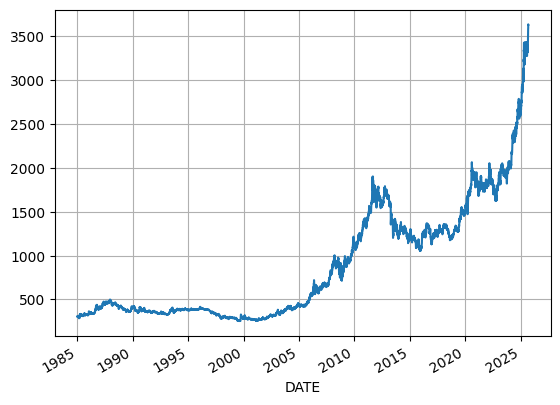

In [15]:
Gold_data.plot(grid=True)

In [16]:
SILVER_data = df['SILVER_PRICE']
SILVER_data.head()

DATE
1985-01-02    6.15
1985-01-03    6.09
1985-01-04    6.03
1985-01-07    5.80
1985-01-08    6.01
Name: SILVER_PRICE, dtype: float64

<Axes: xlabel='DATE'>

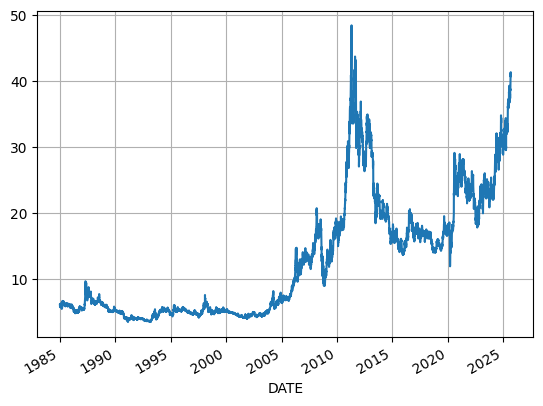

In [17]:
SILVER_data.plot(grid=True)

In [18]:
import plotly.express as px
fig = px.line(df_non_indexed, x='DATE', y='SILVER_PRICE', title='SILVER_PRICE with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [19]:
df.columns

Index(['GOLD_PRICE', 'GOLD_OPEN', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_CHANGE_%',
       'SILVER_PRICE', 'SILVER_OPEN', 'SILVER_HIGH', 'SILVER_LOW',
       'SILVER_CHANGE_%', 'GPRD', 'GPRD_ACT', 'GPRD_THREAT'],
      dtype='object')

In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Gold (left axis)
fig.add_trace(
    go.Scatter(
        x=df_non_indexed["DATE"],
        y=df_non_indexed["GOLD_PRICE"],
        name="Gold Price",
        mode="lines"
    ),
    secondary_y=False
)

# Silver (right axis)
fig.add_trace(
    go.Scatter(
        x=df_non_indexed["DATE"],
        y=df_non_indexed["SILVER_PRICE"],
        name="Silver Price",
        mode="lines"
    ),
    secondary_y=True
)

# Labels
fig.update_layout(
    title="Gold vs Silver Prices",
    xaxis_title="Date"
)

fig.update_yaxes(title_text="Gold Price", secondary_y=False)
fig.update_yaxes(title_text="Silver Price", secondary_y=True)

# Add slider like your PM2.5 chart
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=[
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ]
    )
)

fig.show()


array([[<Axes: title={'center': 'GOLD_PRICE'}>,
        <Axes: title={'center': 'SILVER_PRICE'}>]], dtype=object)

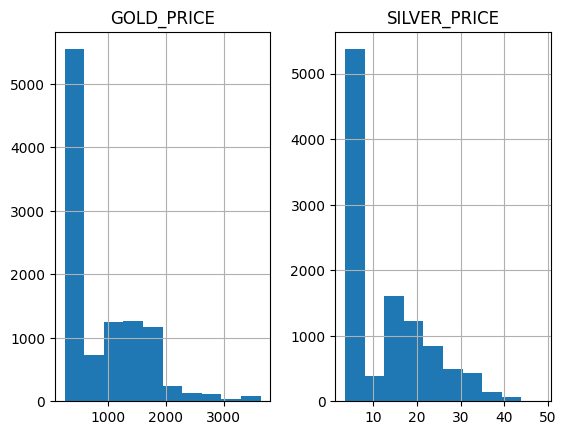

In [21]:
df[['GOLD_PRICE','SILVER_PRICE']].hist()

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

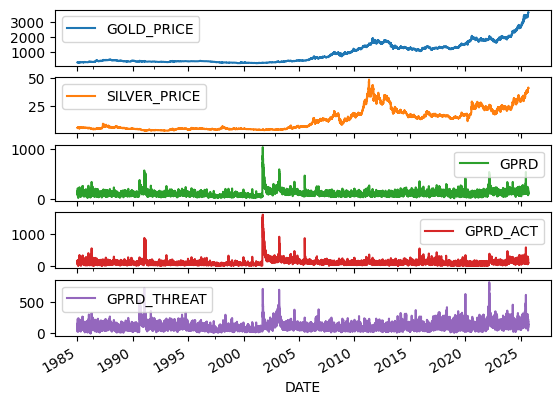

In [22]:
data_sub=df[['GOLD_PRICE','SILVER_PRICE','GPRD','GPRD_ACT','GPRD_THREAT']]
data_sub.plot(subplots=True)

/tmp/ipykernel_127/524414626.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='DATE'>

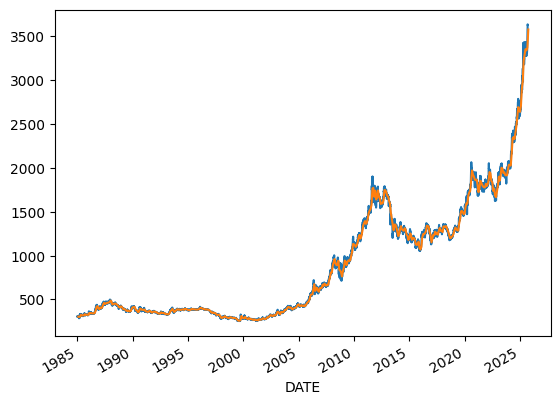

In [23]:
df['GOLD_PRICE'].plot()
df['GOLD_PRICE'].resample('M').mean().plot()

/tmp/ipykernel_127/1179736242.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='DATE'>

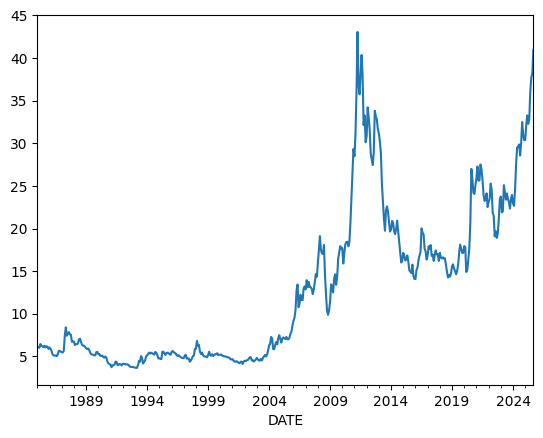

In [24]:
df['SILVER_PRICE'].resample('M').mean().plot()

In [25]:
df.dtypes

GOLD_PRICE         float64
GOLD_OPEN          float64
GOLD_HIGH          float64
GOLD_LOW           float64
GOLD_CHANGE_%      float64
SILVER_PRICE       float64
SILVER_OPEN        float64
SILVER_HIGH        float64
SILVER_LOW         float64
SILVER_CHANGE_%    float64
GPRD               float64
GPRD_ACT           float64
GPRD_THREAT        float64
dtype: object

In [26]:
df_corr=df[['GOLD_PRICE','SILVER_PRICE','GPRD', 'GPRD_THREAT','GPRD_ACT','GOLD_CHANGE_%','SILVER_CHANGE_%']].corr(method='pearson')
df_corr

,GOLD_PRICE,SILVER_PRICE,GPRD,GPRD_THREAT,GPRD_ACT,GOLD_CHANGE_%,SILVER_CHANGE_%
GOLD_PRICE,1.000000,0.924517,0.085538,0.185000,-0.012323,0.023903,0.014992
SILVER_PRICE,0.924517,1.000000,0.025513,0.091752,-0.030410,0.024494,0.022357
GPRD,0.085538,0.025513,1.000000,0.820285,0.867538,-0.006150,-0.004357
GPRD_THREAT,0.185000,0.091752,0.820285,1.000000,0.448382,-0.004838,-0.007397
GPRD_ACT,-0.012323,-0.030410,0.867538,0.448382,1.000000,-0.007690,-0.002159
GOLD_CHANGE_%,0.023903,0.024494,-0.006150,-0.004838,-0.007690,1.000000,0.707704
SILVER_CHANGE_%,0.014992,0.022357,-0.004357,-0.007397,-0.002159,0.707704,1.000000


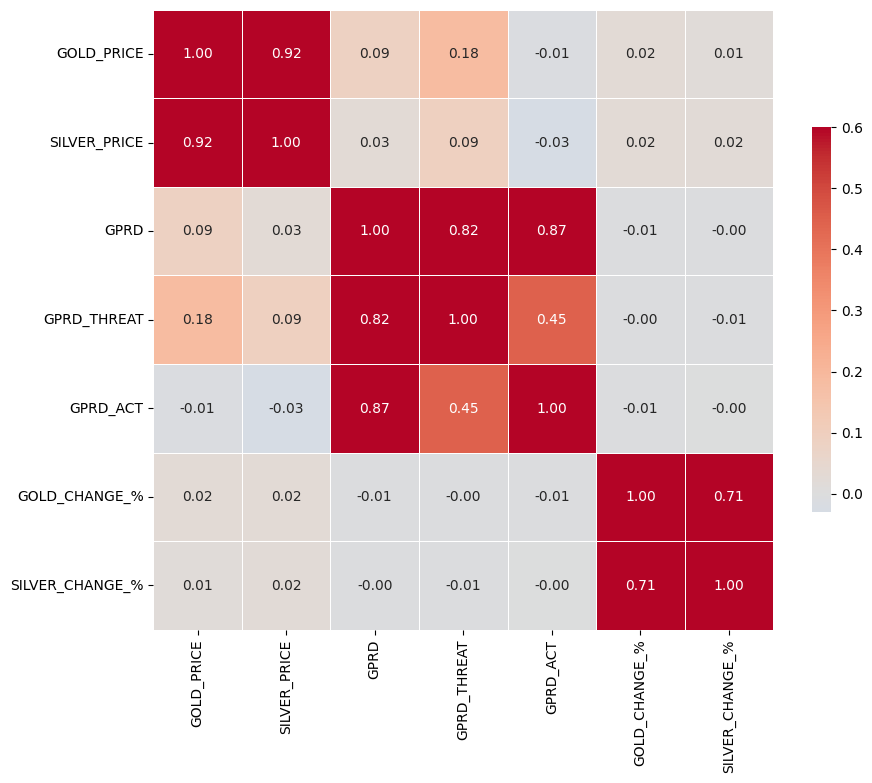

In [27]:
g = sns.heatmap(df_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
plt.show()

In [28]:
df["GPRD_change"] = df["GPRD"].diff()

In [29]:
high_risk = df[df["GPRD"] > df["GPRD"].quantile(0.90)]
low_risk  = df[df["GPRD"] < df["GPRD"].quantile(0.10)]

high_risk["GOLD_PRICE"].mean() - low_risk["GOLD_PRICE"].mean()

np.float64(362.49636707663205)

In [30]:
df['GOLD_CHANGE_%']

DATE
1985-01-02   -0.91
1985-01-03   -1.05
1985-01-04    0.26
1985-01-07   -1.62
1985-01-08    1.27
              ... 
2025-09-05    1.15
2025-09-07    0.12
2025-09-08    1.24
2025-09-09   -0.06
2025-09-10   -0.07
Name: GOLD_CHANGE_%, Length: 10571, dtype: float64

In [31]:
df["GPRD_change"] = df["GPRD"].diff()
df["GPRD_change"]

DATE
1985-01-02      NaN
1985-01-03   -18.25
1985-01-04    59.94
1985-01-07   -52.06
1985-01-08   -17.91
              ...  
2025-09-05    39.62
2025-09-07   -82.91
2025-09-08    33.75
2025-09-09     0.00
2025-09-10     0.00
Name: GPRD_change, Length: 10571, dtype: float64

In [32]:
df.columns

Index(['GOLD_PRICE', 'GOLD_OPEN', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_CHANGE_%',
       'SILVER_PRICE', 'SILVER_OPEN', 'SILVER_HIGH', 'SILVER_LOW',
       'SILVER_CHANGE_%', 'GPRD', 'GPRD_ACT', 'GPRD_THREAT', 'GPRD_change'],
      dtype='object')

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

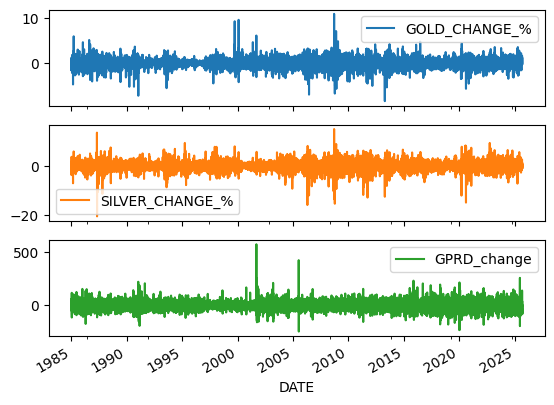

In [33]:
data_sub=df[['GOLD_CHANGE_%','SILVER_CHANGE_%','GPRD_change']]
data_sub.plot(subplots=True)

In [34]:
df

,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD,GPRD_ACT,GPRD_THREAT,GPRD_change
DATE,,,,,,,,,,,,,,
1985-01-02,305.50,305.50,305.50,305.50,-0.91,6.15,6.15,6.15,6.15,-3.30,115.68,146.77,87.44,NaN
1985-01-03,302.30,302.30,302.30,302.30,-1.05,6.09,6.09,6.09,6.09,-0.98,97.43,158.94,29.46,-18.25
1985-01-04,303.10,303.10,303.10,303.10,0.26,6.03,6.03,6.03,6.03,-0.99,157.37,156.88,157.03,59.94
1985-01-07,298.20,298.20,298.20,298.20,-1.62,5.80,5.80,5.80,5.80,-3.81,105.31,57.27,143.30,-52.06
1985-01-08,302.00,302.00,302.00,302.00,1.27,6.01,6.01,6.01,6.01,3.62,87.40,34.85,130.82,-17.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-05,3586.81,3547.00,3600.33,3540.05,1.15,41.01,40.69,41.44,40.55,0.76,166.42,110.61,224.05,39.62
2025-09-07,3591.19,3592.07,3596.56,3586.95,0.12,40.86,41.00,41.01,40.76,-0.34,83.51,111.00,92.59,-82.91
2025-09-08,3635.84,3586.82,3646.60,3579.67,1.24,41.36,41.01,41.68,40.51,1.20,117.26,97.42,146.26,33.75


In [35]:
print(df.columns.tolist())
print(df.index.name)
print(type(df.index))
print(df.index[:5])

['GOLD_PRICE', 'GOLD_OPEN', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_CHANGE_%', 'SILVER_PRICE', 'SILVER_OPEN', 'SILVER_HIGH', 'SILVER_LOW', 'SILVER_CHANGE_%', 'GPRD', 'GPRD_ACT', 'GPRD_THREAT', 'GPRD_change']
DATE
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['1985-01-02', '1985-01-03', '1985-01-04', '1985-01-07',
               '1985-01-08'],
              dtype='datetime64[ns]', name='DATE', freq=None)


In [36]:
df_2015 = df[df.index.year == 2015]

In [37]:
import plotly.express as px

fig = px.scatter(
    df_2015,
    x="GPRD_change",
    y="GOLD_CHANGE_%",
    trendline="ols",
    title="Daily changes in geopolitical risk do NOT predict daily gold return"
)

fig.show()


### 🪙 Gold as a Crisis Hedge

We compare gold performance during **shock** vs **calm** geopolitical periods.

- If **shock return > calm return**  
  → Gold performs better when geopolitical risk explodes  
  → Gold acts as a **crisis hedge**

- If **shock return ≈ calm return**  
  → Gold is **not** a hedge in this sample  

For our sample:

- Mean return in **shock** periods: \(-0.0404\)  
- Mean return in **calm** periods: \(0.1627\)
- Those two numbers are just average returns of gold in two different regimes.

- Shock periods: −0.0404
-- On average, gold lost about 4.0% per period when geopolitical risk was high.

- Calm periods: 0.1627
-- On average, gold gained about 16.3% per period when risk was low.

- So, in this sample, gold actually did worse in crisis than in calm times, -- which argues against gold being a crisis hedge.

- These patterns are about **regime behavior**, not simple correlation.



In [38]:
shock = df_2015[df_2015["GPRD_change"] > df_2015["GPRD_change"].quantile(0.90)]
calm  = df_2015[df_2015["GPRD_change"] < df_2015["GPRD_change"].quantile(0.10)]

shock["GOLD_CHANGE_%"].mean(), calm["GOLD_CHANGE_%"].mean()


(np.float64(-0.0403846153846154), np.float64(0.16269230769230766))

In [39]:
df.columns

Index(['GOLD_PRICE', 'GOLD_OPEN', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_CHANGE_%',
       'SILVER_PRICE', 'SILVER_OPEN', 'SILVER_HIGH', 'SILVER_LOW',
       'SILVER_CHANGE_%', 'GPRD', 'GPRD_ACT', 'GPRD_THREAT', 'GPRD_change'],
      dtype='object')

In [40]:
df.query('SILVER_PRICE != SILVER_PRICE')

,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD,GPRD_ACT,GPRD_THREAT,GPRD_change
DATE,,,,,,,,,,,,,,
1986-06-24,339.98,339.98,339.98,339.98,0.71,NaN,NaN,NaN,NaN,NaN,80.58,89.25,74.45,-5.59
1986-07-25,346.22,346.64,346.22,346.22,0.21,NaN,NaN,NaN,NaN,NaN,38.70,30.86,38.61,-58.49
1986-09-23,431.82,438.37,431.82,431.82,-0.75,NaN,NaN,NaN,NaN,NaN,167.22,111.14,185.40,-21.53
1993-09-01,369.50,372.25,369.50,369.50,-0.81,NaN,NaN,NaN,NaN,NaN,68.65,68.44,64.22,19.73
1994-12-26,381.00,381.00,381.00,381.00,0.17,NaN,NaN,NaN,NaN,NaN,151.00,225.80,109.87,89.80
1995-12-25,387.50,387.50,387.50,387.50,0.06,NaN,NaN,NaN,NaN,NaN,29.93,39.79,16.59,-2.47
2019-12-25,1499.55,1499.55,1499.55,1499.55,0.00,NaN,NaN,NaN,NaN,NaN,45.38,30.16,50.31,-12.84


In [41]:
columns_to_drop = ['GOLD_OPEN', 'GOLD_HIGH', 'GOLD_LOW', 'GOLD_CHANGE_%',
        'SILVER_OPEN', 'SILVER_HIGH', 'SILVER_LOW',
       'SILVER_CHANGE_%', 'GPRD', 'GPRD_ACT', 'GPRD_THREAT', 'GPRD_change']
df = df.drop(columns=columns_to_drop,axis=1)

In [42]:
df['SILVER_PRICE']=df['SILVER_PRICE'].fillna(method='ffill')

/tmp/ipykernel_127/2731550458.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [43]:
df=df.reset_index()

In [44]:
print(f"{df['DATE'].min()} to {df['DATE'].max()}")

1985-01-02 00:00:00 to 2025-09-10 00:00:00


In [45]:
df.set_index('DATE')

,GOLD_PRICE,SILVER_PRICE
DATE,,
1985-01-02,305.50,6.15
1985-01-03,302.30,6.09
1985-01-04,303.10,6.03
1985-01-07,298.20,5.80
1985-01-08,302.00,6.01
...,...,...
2025-09-05,3586.81,41.01
2025-09-07,3591.19,40.86
2025-09-08,3635.84,41.36


In [46]:
df['log_gold']=np.log(df['GOLD_PRICE'])
df['log_silver']=np.log(df['SILVER_PRICE'])

In [47]:
df

,DATE,GOLD_PRICE,SILVER_PRICE,log_gold,log_silver
0,1985-01-02,305.50,6.15,5.721950,1.816452
1,1985-01-03,302.30,6.09,5.711420,1.806648
2,1985-01-04,303.10,6.03,5.714063,1.796747
3,1985-01-07,298.20,5.80,5.697764,1.757858
4,1985-01-08,302.00,6.01,5.710427,1.793425
...,...,...,...,...,...
10566,2025-09-05,3586.81,41.01,8.185019,3.713816
10567,2025-09-07,3591.19,40.86,8.186239,3.710152
10568,2025-09-08,3635.84,41.36,8.198595,3.722314
10569,2025-09-09,3633.61,40.89,8.197982,3.710886


In [48]:
df.columns

Index(['DATE', 'GOLD_PRICE', 'SILVER_PRICE', 'log_gold', 'log_silver'], dtype='object')

In [49]:
df.set_index('DATE')

,GOLD_PRICE,SILVER_PRICE,log_gold,log_silver
DATE,,,,
1985-01-02,305.50,6.15,5.721950,1.816452
1985-01-03,302.30,6.09,5.711420,1.806648
1985-01-04,303.10,6.03,5.714063,1.796747
1985-01-07,298.20,5.80,5.697764,1.757858
1985-01-08,302.00,6.01,5.710427,1.793425
...,...,...,...,...
2025-09-05,3586.81,41.01,8.185019,3.713816
2025-09-07,3591.19,40.86,8.186239,3.710152
2025-09-08,3635.84,41.36,8.198595,3.722314


In [50]:
df_corr=df[[ 'GOLD_PRICE', 'SILVER_PRICE', 'log_gold', 'log_silver']].corr(method='pearson')
df_corr

,GOLD_PRICE,SILVER_PRICE,log_gold,log_silver
GOLD_PRICE,1.000000,0.924540,0.959668,0.910528
SILVER_PRICE,0.924540,1.000000,0.928210,0.964167
log_gold,0.959668,0.928210,1.000000,0.964756
log_silver,0.910528,0.964167,0.964756,1.000000


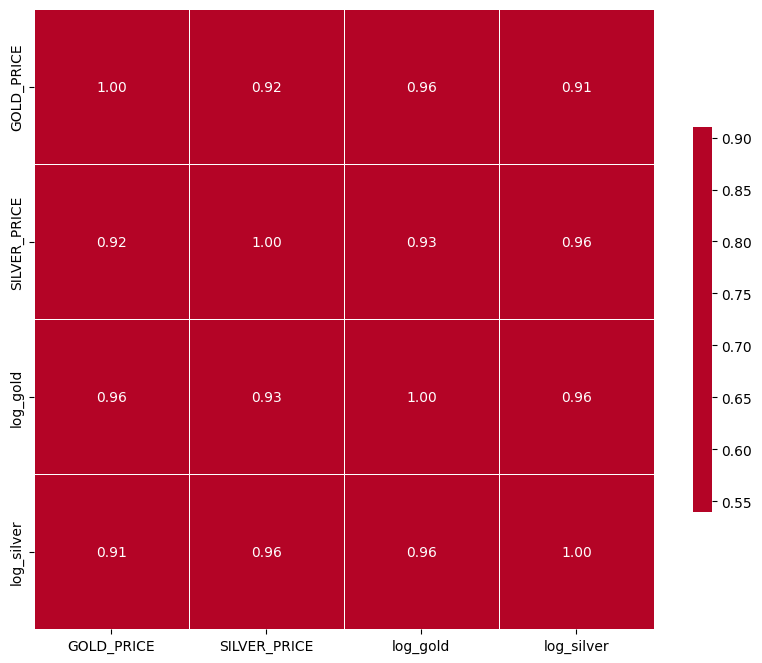

In [51]:
g = sns.heatmap(df_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
plt.show()

In [52]:
class MeraLR:
    def __init__(self):
        self.m=None
        self.b=None

    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num= num+ ((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den= den + ((X_train[i]-X_train.mean()))*((X_train[i]-X_train.mean()))

        self.m= num/den
        self.b= y_train.mean()- (self.m*X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self,X_test):
        print(X_test)

        return self.m*X_test + self.b

In [53]:
lr= MeraLR()

In [54]:
X = df['log_silver'].values
y = df['log_gold'].values

In [55]:
lr.fit(X,y)

0.9856147158774535
4.255055050627507


## Batch Gradient Descent

In [56]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=10
        self.b=-10
        self.lr=learning_rate
        self.epochs= epochs

    def fit(self,X,y):
        # Calculate the b using GD
        X=X.ravel()
        n=len(X)
        for i in range(self.epochs):
            y_hat = self.m*X+self.b
            loss_slope_b= (-2/n)*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m= (-2/n)*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())

            self.b= self.b-(self.lr*loss_slope_b)
            self.m= self.m-(self.lr*loss_slope_m)

        print(self.m,self.b)

    def predict(self,X):
        return self.m*X+self.b

In [57]:
gd=GDRegressor(0.01,75)

In [58]:
gd.fit(X,y)

6.515787982699788 -9.489510474339756


In [59]:
X.shape

(10571,)

## Stochastic Gradient Descent

In [60]:
class SGDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_=None
        self.intercept=None
        self.lr=learning_rate
        self.epochs= epochs

    def fit(self,X_train,y_train):
        # Init the coefs
        self.coef = np.ones(1)
        self.intercept = 0

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                iex= np.random.randint(X_train.shape[0])
                y_hat= np.dot(X_train[iex],self.coef)+self.intercept
                intercept_der = -2 * (y_train[iex] - y_hat)
                self.intercept = self.intercept - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[iex] - y_hat),X_train[iex])
                self.coef_= self.coef - (self.lr * coef_der)

        print(self.intercept,self.coef)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef) + self.intercept

                

In [61]:
sgd = SGDRegressor(learning_rate=0.01,epochs=20)

In [62]:
sgd.fit(X,y)

[4.23600809] [1.]


## 📌 Understanding Beta in a Gold–Silver Pair Strategy

---

<div style="
background-color:#f7f9fc;
border-left:6px solid #4c72b0;
padding:18px;
border-radius:8px;
font-family:Arial, sans-serif;
">

### 🔹 What is Beta (β)?

In simple terms, **Beta measures sensitivity**.

For a pair like **Gold vs Silver**, Beta tells us:

> *If Gold moves by 1 unit, how much does Silver typically move?*

Mathematically, Beta comes from a regression:

<div style="
background-color:#f7f9fc;
border-left:6px solid #4c72b0;
padding:18px;
border-radius:8px;
font-family:Arial, sans-serif;
">

<b>Regression relationship:</b>

<p style="font-size:15px; margin-left:10px;">
Silver<sub>t</sub> = α + β × Gold<sub>t</sub> + ε<sub>t</sub>
</p>

</div>


- **β > 1** → Silver is more volatile than Gold  
- **β < 1** → Silver moves less than Gold  
- **β ≈ 1** → Both move proportionally  

In pair trading, **Beta is NOT about prediction** —  
it is about **scaling and neutrality**.

---

### 🔹 What Were the Real Doubts?

These are valid doubts — ignoring them breaks strategies:

#### ❓ 1. *Why does Beta keep changing over time?*
Because **market regimes change**.  
Macro events, liquidity, industrial demand for silver — all shift relationships.

👉 **Static Beta is wrong for trading.**  
You need **rolling or dynamic Beta**.

---

#### ❓ 2. *If Beta changes, can I trust it at all?*
Yes — but **only locally**.

Think of Beta like a moving average:
- Bad globally
- Useful in short windows

---

#### ❓ 3. *Is Beta predicting price?*
No.  
Beta **does not forecast direction**.

It only answers:
> “How much Silver should move *given* Gold moved?”

Prediction comes later (ARIMA / residual modeling).

---

### 🔹 The Relationship You Actually Obtained

Once Beta is estimated correctly, the real object is the **spread**:

\[
\text{Spread}_t = \text{Silver}_t - \beta_t \cdot \text{Gold}_t
\]

This spread:
- Removes market-wide movement
- Is often **mean reverting**
- Is what you actually trade

---

### 🔹 Small Numerical Example

Assume rolling regression gives:

- β = **0.72**
- Gold today = **2000**
- Silver today = **26**

\[
\text{Spread} = 26 - (0.72 \times 2000) = -1414
\]

Now:
- Large negative spread → Silver undervalued vs Gold
- Large positive spread → Silver overvalued vs Gold

👉 **Trade the spread, not the prices.**

---

### 🔹 Final Insight (This Matters)

Beta is **not a constant truth**.  
It is a **temporary scaling factor**.

Used correctly:
- Beta → scale
- Spread → signal
- ARIMA → timing

Used incorrectly:
- Beta → false confidence
- Static hedge → slow death

---

</div>


In [63]:
beta = lr.m
alpha = lr.b

<Axes: >

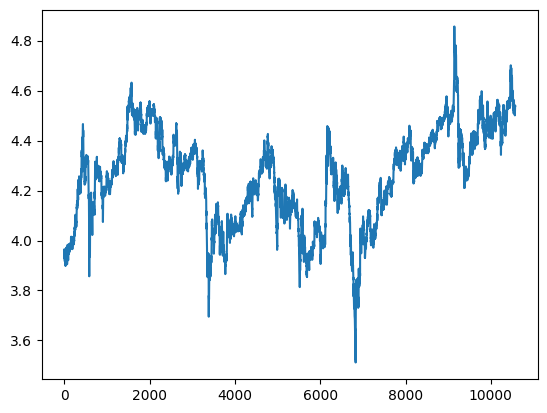

In [64]:
df['spread'] = df['log_gold'] - beta * df['log_silver']
df['spread'].plot()

<div style="background:#020617;padding:20px;border-radius:12px;color:#f8fafc;font-family:Arial;line-height:1.6;">

<b>What the Augmented Dickey–Fuller (ADF) test actually checks</b><br><br>

The ADF test is a hypothesis test on whether a time series contains a <b>unit root</b>.<br><br>

<b>Null hypothesis (H₀):</b> The series has a unit root → it is non-stationary<br>
<b>Alternative hypothesis (H₁):</b> The series is stationary<br><br>

In plain terms, ADF checks whether yesterday’s level predicts today’s change too well.  
If past levels strongly drive current changes, the series behaves like a random walk and is non-stationary.<br><br>

The test starts by differencing the series:<br><br>

<div style="background:#0f172a;padding:12px;border-radius:8px;text-align:center;">
ΔX<sub>t</sub> = X<sub>t</sub> − X<sub>t−1</sub>
</div><br>

For example, if prices move from 100 → 102 → 105, the differences are +2 and +3.  
ADF asks whether these differences are random or still controlled by past price levels.<br><br>

The core ADF regression is:<br><br>

<div style="background:#0f172a;padding:12px;border-radius:8px;text-align:center;">
ΔX<sub>t</sub> = α + βX<sub>t−1</sub> + ε<sub>t</sub>
</div><br>

Here, <b>β</b> is the key parameter.  
If β = 0, yesterday’s level has no effect and the series contains a unit root.  
If β &lt; 0 and statistically significant, the series exhibits mean reversion and is stationary.<br><br>

Suppose OLS estimation gives:<br><br>

<div style="background:#0f172a;padding:12px;border-radius:8px;">
ΔX<sub>t</sub> = −0.1 + 0.12X<sub>t−1</sub><br><br>
β̂ = 0.12<br>
SE(β̂) = 0.20
</div><br>

The ADF statistic is simply the t-statistic on β̂:<br><br>

<div style="background:#0f172a;padding:12px;border-radius:8px;text-align:center;">
ADF = β̂ / SE(β̂) = 0.12 / 0.20 = 0.6
</div><br>

ADF statistics are compared against non-standard critical values that are negative (≈ −2.9 at 5%).  
Since 0.6 is far above the critical threshold, we fail to reject the null hypothesis.<br><br>

<b>Conclusion:</b><br>
The series behaves like a unit-root process and is non-stationary.  
There is no statistically meaningful pull from past levels toward a stable mean.<br><br>

Mental image: a drunk person on ice.  
Stationary series get pulled back; unit-root series keep drifting.  
ADF is checking whether that pull exists — here, it does not.

</div>


# Stationarity Check

## KPSS-->Is the mean constant over the entire 40-year period?
### Null hypothesis - Series is stationary

### Alternate hypothesis - Series is not stationary

## ADF-->“No unit root → stationary enough”
### Null Hypothesis - Series possesses a unit root and hence is not stationary

### Alternate Hypothesis - Series is stationary

In [65]:
from statsmodels.tsa.stattools import kpss,adfuller

In [66]:
print("\nSTEP 5: Stationarity Testing and Data Validation")
print("=" * 60)

def perform_stationarity_tests(series, series_name):
    """Perform comprehensive stationarity testing with error handling"""
    print(f"\nStationarity Analysis: {series_name}")
    print("-" * 40)
    
    # Remove NaN values and ensure we have enough data
    clean_series = series.dropna()
    
    if len(clean_series) < 50:
        print(f"Warning: Series too short ({len(clean_series)} observations) for reliable testing")
        return False
    
    try:
        # Augmented Dickey-Fuller Test with automatic lag selection
        # Use maxlag parameter to avoid sample size issues
        max_lags = min(int(4 * (len(clean_series) / 100) ** 0.25), len(clean_series) // 4)
        
        adf_result = adfuller(clean_series, maxlag=max_lags, regression='c')
        
        print(f"ADF Test Results:")
        print(f"  ADF Statistic: {adf_result[0]:.6f}")
        print(f"  p-value: {adf_result[1]:.6f}")
        print(f"  Used lags: {adf_result[2]}")
        print(f"  Observations: {adf_result[3]}")
        print(f"  Critical Values:")
        for key, value in adf_result[4].items():
            print(f"    {key}: {value:.4f}")
        
        adf_stationary = adf_result[1] <= 0.05
        print(f"  Result: {'Stationary' if adf_stationary else 'Non-stationary'}")
        
    except Exception as e:
        print(f"ADF test failed: {e}")
        adf_stationary = False
    
    # KPSS Test with error handling
    try:
        kpss_result = kpss(clean_series, regression='c', nlags='auto')
        print(f"\nKPSS Test Results:")
        print(f"  KPSS Statistic: {kpss_result[0]:.6f}")
        print(f"  p-value: {kpss_result[1]:.6f}")
        print(f"  Used lags: {kpss_result[2]}")
        print(f"  Critical Values:")
        for key, value in kpss_result[3].items():
            print(f"    {key}: {value:.4f}")
        
        kpss_stationary = kpss_result[1] >= 0.05
        print(f"  Result: {'Stationary' if kpss_stationary else 'Non-stationary'}")
        
        # Consensus between tests
        consensus = adf_stationary and kpss_stationary
        print(f"\nConsensus Result: {'Stationary' if consensus else 'Non-stationary'}")
        
    except Exception as e:
        print(f"KPSS test failed: {e}")
        print(f"Using only ADF test result: {'Stationary' if adf_stationary else 'Non-stationary'}")
        consensus = adf_stationary
    
    return consensus


STEP 5: Stationarity Testing and Data Validation


In [67]:
stationary = perform_stationarity_tests(df['spread'], '(Training Data)')


Stationarity Analysis: (Training Data)
----------------------------------------
ADF Test Results:
  ADF Statistic: -3.271436
  p-value: 0.016205
  Used lags: 8
  Observations: 10562
  Critical Values:
    1%: -3.4310
    5%: -2.8618
    10%: -2.5669
  Result: Stationary

KPSS Test Results:
  KPSS Statistic: 2.511717
  p-value: 0.010000
  Used lags: 60
  Critical Values:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390
  Result: Non-stationary

Consensus Result: Non-stationary


/tmp/ipykernel_127/725123860.py:41: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




# 📉 Unit Roots, Stationarity & the Reality of Long-Run Economics

> **Verdict:**
> ❗ The series **does not have a unit root**
> ❗ But it is **not strictly level-stationary either**

This is **not a contradiction**.
It’s economics showing up in statistics.

---

## 🧠 What’s really happening (intuition first)

Over a **40+ year horizon**, the world doesn’t sit still:

* ⛏️ **Mining supply evolves** (technology, discoveries, regulation)
* 🏦 **Monetary regimes change** (gold standards, fiat transitions, QE eras)
* 🏭 **Industrial vs monetary demand for silver shifts**
* 🪙 **Gold & silver reserve policies are redefined**

All of this means one thing:

> ⚠️ **The “average level” of the series itself moves slowly over time**

Not explosively.
Not randomly.
Just… drifting.

---

## 🔬 Why ADF and KPSS disagree (and both are right)

### ✅ ADF Test (Augmented Dickey–Fuller)

* Asks: *Is there a unit root?*
* Blind to slow-moving means
* If shocks die out → **ADF passes**

👉 ADF only cares about **runaway stochastic trends**

---

### ❌ KPSS Test

* Asks: *Is the level truly constant over time?*
* Extremely sensitive to **mean drift**
* Structural changes = violation

👉 KPSS hates **anything that nudges the mean**

---

## 📌 Small visual example (lock this in)

Imagine this process:

```
Year 1–10   → mean ≈ 10
Year 11–20  → mean ≈ 12
Year 21–30  → mean ≈ 14
```

Each shock:

* fades away ✅ (mean-reverting)
  But the **target mean itself moves** ⏳

📉 That’s **not** a unit root
📉 That’s **not** level stationarity
📉 That’s **structural drift**

---

## 🧩 Interpreting the test outcome correctly

### 🔎 Result:

* **ADF passes**
* **KPSS fails**

### 🧠 Translation:

> **Mean-reverting process with a drifting mean**

This is exactly what you expect for:

* Commodity prices
* Macro aggregates
* Long-run financial series

---

## 🧭 Key Takeaway (burn this into memory)

### 🚨 **ADF pass + KPSS fail ≠ “confusing results”**

It means:

> 🟢 Shocks are temporary
> 🟡 Long-run equilibrium evolves
> 🔵 Structure matters more than randomness

---

## 🛠️ What you should do next (practitioner mindset)

Instead of forcing stationarity:

* 🔹 Model **structural breaks**
* 🔹 Use **rolling means / regimes**
* 🔹 Consider **trend-stationary** or **state-space** models
* 🔹 Detrend economically, not mechanically

📌 **Statistics diagnose — economics explains**

---

### 🧠 Final punchline

> The series is *stable*,
> but the world it lives in is not.

And that’s exactly how real data behaves.


In [68]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

window = 742
betas = []

for i in range(window, len(df)):
    y = df['log_gold'].iloc[i-window:i]
    X = df[['log_silver']].iloc[i-window:i]
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    betas.append(lr.coef_[0])

df['beta_rolling'] = [np.nan]*window + betas


In [92]:
# Beta Going negatives and sudden spikes isn't good

<Axes: title={'center': 'Rolling Beta (2Y Window)'}>

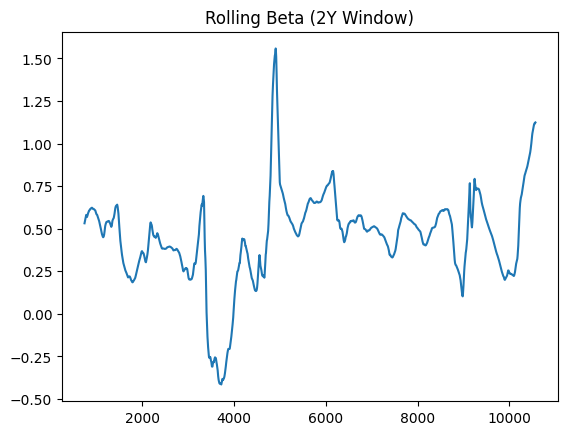

In [69]:
df['beta_rolling'].plot(title='Rolling Beta (2Y Window)')

In [70]:
df['spread_rolling'] = df['log_gold'] - df['beta_rolling'] * df['log_silver']

<Axes: title={'center': 'Rolling-Beta Spread'}>

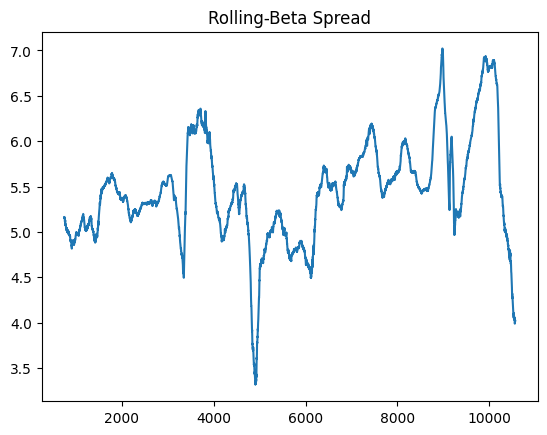

In [71]:
df['spread_rolling'].plot(title='Rolling-Beta Spread')

In [72]:
from statsmodels.tsa.stattools import adfuller

def rolling_adf(series, window):
    pvals = [np.nan]*window
    
    for i in range(window, len(series)):
        s = series.iloc[i-window:i].dropna()
        if len(s) < 50:
            pvals.append(np.nan)
        else:
            pvals.append(adfuller(s, autolag='AIC')[1])
    
    return pvals

df['adf_pval'] = rolling_adf(df['spread_rolling'], window=90)


In [73]:
(df['adf_pval'] < 0.05).mean()

np.float64(0.08078705893482169)

In [74]:
# 1. Slow beta
beta_window = 756   # 3 years
adf_window = 252    # 1 year

df['beta_slow'] = np.nan

for i in range(beta_window, len(df)):
    y = df['log_gold'].iloc[i-beta_window:i]
    X = df[['log_silver']].iloc[i-beta_window:i]
    lr = LinearRegression()
    lr.fit(X, y)
    df.loc[df.index[i], 'beta_slow'] = lr.coef_[0]

# 2. Spread with slow beta
df['spread_slow'] = df['log_gold'] - df['beta_slow'] * df['log_silver']

# 3. Fast rolling ADF
df['adf_pval'] = rolling_adf(df['spread_slow'], window=252)


<Axes: title={'center': 'Slow Rolling Beta (756 days)'}>

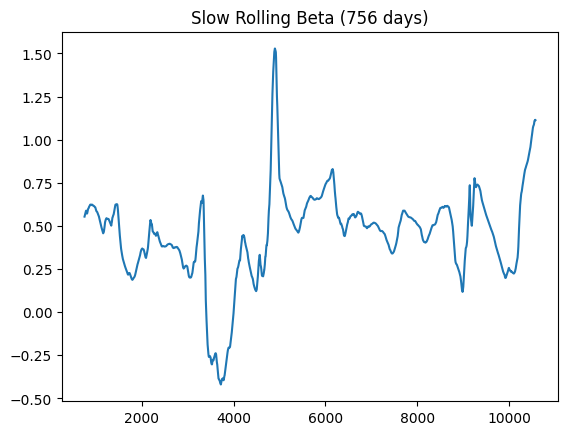

In [75]:
df['beta_slow'].plot(title='Slow Rolling Beta (756 days)')

## Regime Selection for Current Study (Gold–Silver Relationship)

Financial time series do not obey a single stable relationship across long horizons.  
The Gold–Silver price history exhibits **clear structural regime shifts**, making full-sample regression, β estimation, and cointegration tests unreliable.

To address this, the analysis is conducted **within a single, economically consistent regime**.

---

### Identified Historical Regimes

| Period | Regime Description | Key Characteristics |
|------|-------------------|--------------------|
| 1985–2003 | Low-volatility monetary regime | Flat prices, weak commodity demand |
| 2004–2012 | Commodity supercycle | Financialization, speculative silver spike |
| 2013–2019 | Post-bubble normalization | Mean reversion, subdued inflation |
| **2020–Present** | **Crisis + inflation regime** | QE, fiscal stimulus, inflation hedging |

---

### Why Focus on the 2020–Present Regime

**1. Structural Consistency**  
Post-2020 markets are dominated by:
- Aggressive monetary expansion (QE)
- Elevated inflation expectations
- Safe-haven demand for gold  
- High-beta, follower behavior in silver  

This creates a more stable conditional relationship than earlier regimes.

---

**2. Improved Statistical Behavior**  
Restricting analysis to this regime:
- Reduces rolling β instability  
- Mitigates spurious regression effects  
- Improves residual stationarity in spread models  

---

**3. Relevance Over Sample Size**  
Earlier regimes reflect:
- Different monetary systems  
- Different demand structures  
- Non-comparable price dynamics  

For modern modeling, **regime relevance dominates historical coverage**.

---

### Modeling Assumption

> The Gold–Silver relationship from 2020 onward is treated as a **distinct and self-contained regime**, analyzed independently from prior periods.

All subsequent:
- β estimation  
- Cointegration testing  
- Spread construction  

are performed **exclusively within this regime**.


# Step-3 Regime 2020 Onwards

In [76]:
df_non_indexed

,DATE,GOLD_PRICE,GOLD_OPEN,GOLD_HIGH,GOLD_LOW,GOLD_CHANGE_%,SILVER_PRICE,SILVER_OPEN,SILVER_HIGH,SILVER_LOW,SILVER_CHANGE_%,GPRD,GPRD_ACT,GPRD_THREAT
0,1985-01-02,305.50,305.50,305.50,305.50,-0.91,6.15,6.15,6.15,6.15,-3.30,115.68,146.77,87.44
1,1985-01-03,302.30,302.30,302.30,302.30,-1.05,6.09,6.09,6.09,6.09,-0.98,97.43,158.94,29.46
2,1985-01-04,303.10,303.10,303.10,303.10,0.26,6.03,6.03,6.03,6.03,-0.99,157.37,156.88,157.03
3,1985-01-07,298.20,298.20,298.20,298.20,-1.62,5.80,5.80,5.80,5.80,-3.81,105.31,57.27,143.30
4,1985-01-08,302.00,302.00,302.00,302.00,1.27,6.01,6.01,6.01,6.01,3.62,87.40,34.85,130.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10566,2025-09-05,3586.81,3547.00,3600.33,3540.05,1.15,41.01,40.69,41.44,40.55,0.76,166.42,110.61,224.05
10567,2025-09-07,3591.19,3592.07,3596.56,3586.95,0.12,40.86,41.00,41.01,40.76,-0.34,83.51,111.00,92.59
10568,2025-09-08,3635.84,3586.82,3646.60,3579.67,1.24,41.36,41.01,41.68,40.51,1.20,117.26,97.42,146.26
10569,2025-09-09,3633.61,3637.10,3674.75,3625.33,-0.06,40.89,41.34,41.50,40.77,-1.13,117.26,97.42,146.26


In [77]:
df_non_indexed.drop(columns=[ 'GOLD_OPEN', 'GOLD_HIGH', 'GOLD_LOW',
       'GOLD_CHANGE_%','SILVER_OPEN', 'SILVER_HIGH',
       'SILVER_LOW', 'SILVER_CHANGE_%', 'GPRD', 'GPRD_ACT', 'GPRD_THREAT'],inplace=True)

In [78]:
df_non_indexed['DATE']= pd.to_datetime(df_non_indexed['DATE'])
df_non_indexed= df_non_indexed.sort_values('DATE').reset_index(drop=True)

In [79]:
df_non_indexed.columns

Index(['DATE', 'GOLD_PRICE', 'SILVER_PRICE'], dtype='object')

In [80]:
df_non_indexed['DATE'] = pd.to_datetime(df_non_indexed['DATE'])

In [81]:
df_non_indexed.set_index('DATE',inplace=True)

In [82]:
df_non_indexed=df_non_indexed.loc['2020':]

In [83]:
df_non_indexed['SILVER_PRICE']=df_non_indexed['SILVER_PRICE'].fillna(method='ffill')

/tmp/ipykernel_127/1909319206.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [84]:
df_non_indexed['log_gold']=np.log(df_non_indexed['GOLD_PRICE'])
df_non_indexed['log_silver']=np.log(df_non_indexed['SILVER_PRICE'])

In [85]:
df_non_indexed.loc['2020':]

,GOLD_PRICE,SILVER_PRICE,log_gold,log_silver
DATE,,,,
2020-01-01,1517.30,17.83,7.324688,2.880882
2020-01-02,1528.94,18.01,7.332330,2.890927
2020-01-03,1551.65,18.03,7.347074,2.892037
2020-01-06,1565.96,18.14,7.356254,2.898119
2020-01-07,1573.99,18.39,7.361369,2.911807
...,...,...,...,...
2025-09-05,3586.81,41.01,8.185019,3.713816
2025-09-07,3591.19,40.86,8.186239,3.710152
2025-09-08,3635.84,41.36,8.198595,3.722314


In [86]:
X = df_non_indexed['log_silver'].dropna().values
y = df_non_indexed['log_gold'].dropna().values

lr = MeraLR()
lr.fit(X, y)


0.8456770717722353
4.9139491152955745


In [87]:
beta = lr.m
alpha = lr.b

## Interpretation

### Long spread → Silver rich vs Gold

### Short spread → Silver cheap vs Gold

### Exactly what a macro pair should capture

In [97]:
df_weekly = (
    df_non_indexed       # must be datetime
    .resample('W-FRI')
    .last()
)

In [98]:
df_weekly['spread'] = (
    df_weekly['log_silver']
    - beta * df_weekly['log_gold']
)

<Axes: xlabel='DATE'>

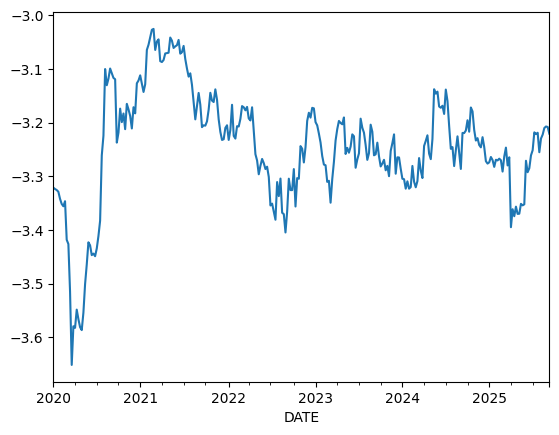

In [99]:
df_weekly['spread'].plot()

<div style="
    background-color:#fafafa;
    padding:22px;
    border-radius:10px;
    font-family:Arial, Helvetica, sans-serif;
    line-height:1.7;
    color:#222;
">

  <h3 style="margin-top:0;">⚖️ Interpreting the Spread</h3>

  <p>
    In equilibrium, the spread is approximately zero.
  </p>

  <p style="
      background-color:#ffffff;
      padding:10px;
      border-radius:6px;
      border:1px solid #e0e0e0;
      text-align:center;
      font-size:16px;
  ">
    \[
      \log(\text{Silver}) - 1.5 \log(\text{Gold}) \approx 0
    \]
  </p>

  <p style="margin-top:18px;">
    Now suppose:
  </p>

  <ul style="margin-left:20px;">
    <li>Gold ↑ 10%</li>
    <li>Silver ↑ <b>30%</b></li>
  </ul>

  <p style="margin-top:14px;">
    The spread becomes:
  </p>

  <p style="
      background-color:#ffffff;
      padding:10px;
      border-radius:6px;
      border:1px solid #e0e0e0;
      text-align:center;
      font-size:16px;
  ">
    \[
      \text{spread}
      = \log(\text{Silver}) - 1.5 \log(\text{Gold})
      > 0
    \]
  </p>

  <p style="margin-top:18px;">
    Interpretation:
  </p>

  <p style="
      background-color:#f5f5f5;
      padding:12px;
      border-left:4px solid #d32f2f;
      border-radius:6px;
      font-size:15px;
  ">
    Spread &gt; 0  ⇒  Silver is <b>rich</b>
  </p>

  <p style="margin-top:14px;">
    Correct trade:
  </p>

  <table style="
      border-collapse:collapse;
      margin-top:10px;
      width:100%;
      background-color:#ffffff;
  ">
    <tr>
      <th style="border:1px solid #e0e0e0; padding:8px;">Asset</th>
      <th style="border:1px solid #e0e0e0; padding:8px;">Action</th>
      <th style="border:1px solid #e0e0e0; padding:8px;">Reason</th>
    </tr>
    <tr>
      <td style="border:1px solid #e0e0e0; padding:8px;">Silver</td>
      <td style="border:1px solid #e0e0e0; padding:8px;"><b>Short</b></td>
      <td style="border:1px solid #e0e0e0; padding:8px;">Overpriced relative to Gold</td>
    </tr>
    <tr>
      <td style="border:1px solid #e0e0e0; padding:8px;">Gold</td>
      <td style="border:1px solid #e0e0e0; padding:8px;"><b>Long</b></td>
      <td style="border:1px solid #e0e0e0; padding:8px;">Underpriced relative to Silver</td>
    </tr>
  </table>

  <p style="
      margin-top:20px;
      padding:12px;
      background-color:#fff3e0;
      border-left:4px solid #f57c00;
      border-radius:6px;
      font-size:15px;
  ">
    <b>Critical:</b> This strategy only works with the <b>correct hedge direction</b>.
    Reversing the hedge amplifies the mispricing instead of correcting it.
  </p>

</div>


In [100]:
stationary = perform_stationarity_tests(df_weekly['spread'], '(Trains Data)')


Stationarity Analysis: (Trains Data)
----------------------------------------
ADF Test Results:
  ADF Statistic: -2.653920
  p-value: 0.082357
  Used lags: 0
  Observations: 297
  Critical Values:
    1%: -3.4526
    5%: -2.8713
    10%: -2.5720
  Result: Non-stationary

KPSS Test Results:
  KPSS Statistic: 0.178095
  p-value: 0.100000
  Used lags: 10
  Critical Values:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390
  Result: Stationary

Consensus Result: Non-stationary


/tmp/ipykernel_127/725123860.py:41: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


